## CMSC 197 - Homework 3
#### Lester D. Piorque BSCS IV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import preprocessing                           # standardization 
from sklearn.model_selection import train_test_split        # train and test sets 
from sklearn.metrics import r2_score, mean_squared_error    # r2 scores and MSE  
from sklearn.linear_model import LinearRegression           # OLS result

In [2]:
df = pd.read_csv("Advertising.csv", index_col = 0)          # data from advertising.csv
print("Size of data:", df.shape)                            # size of data
df.head()

Size of data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.describe()               # describe the table

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [5]:
print(df.mean())          # mean of each column in the table
print(df.std())           # standard deviation

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64
TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.217457
dtype: float64


# Standardize each column

In [6]:
df_copy = df.copy()

# standardized values of TV
tv_mean = df_copy['TV'].mean()
tv_std = df_copy['TV'].std()
df_copy['TV'] = (df_copy['TV'] - tv_mean) / tv_std

# standardized values of Radio
radio_mean = df_copy['Radio'].mean()
radio_std = df_copy['Radio'].std()
df_copy['Radio'] = (df_copy['Radio'] - radio_mean) / radio_std

# standardized values of Newspaper
np_mean = df_copy['Newspaper'].mean()
np_std = df_copy['Newspaper'].std()
df_copy['Newspaper'] = (df_copy['Newspaper'] - np_mean) / np_std

# standardized values of Sales
sales_mean = df_copy['Sales'].mean()
sales_std = df_copy['Sales'].std()
df_copy['Sales'] = (df_copy['Sales'] - sales_mean) / sales_std

df_copy

,TV,Radio,Newspaper,Sales
1,0.967425,0.979066,1.774493,1.548168
2,-1.194379,1.080097,0.667903,-0.694304
3,-1.512360,1.524637,1.779084,-0.905135
4,0.051919,1.214806,1.283185,0.858177
5,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
196,-1.267759,-1.317724,-0.769287,-1.230964
197,-0.615491,-1.236899,-1.031011,-0.828469
198,0.348934,-0.940539,-1.109069,-0.234310
199,1.590574,1.261955,1.636743,2.199827


In [7]:
df_standardize = preprocessing.scale(df)                              # sklearn preprocessing.scale function
df_standardize = pd.DataFrame(df_standardize, columns = df.columns)   # standardized values to dataset

df_standardize

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [8]:
df_standardize.insert(0, 'bias', 1)                 # inserting bias
df_standardize

,bias,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


In [9]:
x = df_standardize[["bias", "TV", "Radio", "Newspaper"]]    # setting the features as x
y = df_standardize["Sales"]                                 # sales as y
x

,bias,TV,Radio,Newspaper
0,1,0.969852,0.981522,1.778945
1,1,-1.197376,1.082808,0.669579
2,1,-1.516155,1.528463,1.783549
3,1,0.052050,1.217855,1.286405
4,1,0.394182,-0.841614,1.281802
...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217
196,1,-0.617035,-1.240003,-1.033598
197,1,0.349810,-0.942899,-1.111852
198,1,1.594565,1.265121,1.640850


In [10]:
# dividing the data into training and testing, 0.75 and 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size = 0.25)
print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 4)
y_train size: (150,)

x_test size: (50, 4)
y_test size: (50,)


# Fitting the model on the training set

### initialize_weights

In [11]:
def initialize_weights(x_val, random = False):
    x_val_len = x_val.shape[1]                     # weight length is the number of columns in x 
    if random:                                     # initialized radomly if random length
        return np.random.rand(x_val_len)
    return np.zeros(x_val_len)                     # or initialized to zero

In [12]:
init_w = initialize_weights(x_train)
init_w

array([0., 0., 0., 0.])

### predict

In [13]:
def predict(x_val, init_w):
    return np.dot(x_val, init_w)                      # multiply the x value to the weights

In [15]:
# predicting the training values given the set of weights
y_hat_train = predict(x_train, initialize_weights(x_train, random = True))

# comparing predicted and actual values
df_train = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': y_hat_train})
df_train

,Actual Values,Predicted Values
53,1.379122,2.207430
101,1.878700,2.835096
129,-0.830548,-0.662824
196,-0.830548,-1.462700
159,-0.215683,-0.065293
...,...,...
179,-0.273327,-0.664031
89,0.514469,1.833487
99,0.610541,1.509590
92,1.033261,1.630316


### compute_cost

In [16]:
def compute_cost(x_val, y, init_w):  
    sale_len = len(y)                 # length of response
    
    cost_function = 1/(2*sale_len) * np.sum((predict(x_val, init_w) - y)**2)
    return cost_function              # getting the cost formula

In [17]:
#Print the cost function of the training set utilizing a random set of weights
cost_test = compute_cost(x_train, y_train, initialize_weights(x_train, random = True))
print(cost_test)

0.19372362074313507


### compute_gradient

In [18]:
def compute_gradient(x_val, y, init_w):
    sale_len = len(y)               # length of sale
    w = 1/sale_len * np.dot(x_val.T, (predict(x_val, init_w) - y))

    return w     # return matrix w

### update_weights

In [19]:
def update_weights(x_val, y, init_w, alpha):   # incrementing the weights
    return init_w - alpha * compute_gradient(x_val, y, init_w)

### grad_descent

In [20]:
def grad_descent(x_val, y, init_w, alpha, iterations):      # return two matrices
    weights_matrix = [0] * iterations
    cost_matrix = [0] * iterations

    for i in range(iterations):                             # for loop in the number of iterations, batch gradient descent 
        init_w = update_weights(x_val, y, init_w, alpha)    # changing weights
        weights_matrix[i] = init_w                          # store the weights in the weights_matrix
        cost = compute_cost(x_val, y, init_w)               # compute cost
        cost_matrix[i] = cost                               # store the cost in the cost_matrix
    
    return weights_matrix, cost_matrix                      # returns two matrices

### plot_costs

In [21]:
def plot_costs(cost_array):                                 # plots the cost as a function of iteration
    plt.figure(figsize=(15,8))
    plt.plot(cost_array)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost over Iterations')
    plt.show()

### Predict y for train set and calculate the cost

In [22]:
init_w = initialize_weights(x_train, random = True)
y_hat_train = predict(x_train, init_w)
y_hat_train_df = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': y_hat_train})
y_hat_train_df

,Actual Values,Predicted Values
53,1.379122,1.334775
101,1.878700,2.042156
129,-0.830548,0.273361
196,-0.830548,0.081191
159,-0.215683,0.604052
...,...,...
179,-0.273327,0.528992
89,0.514469,0.975268
99,0.610541,0.975703
92,1.033261,1.345085


In [23]:
train_cost = compute_cost(x_train, y_train, init_w)
train_cost
print("Cost of the predicted values:", train_cost)

Cost of the predicted values: 0.40203650504703037


### Predict y for test set and calculate the cost

In [24]:
init_w = initialize_weights(x_test, random = True)
y_hat_test = predict(x_test, init_w)
y_hat_test_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_hat_test})
y_hat_test_df['Residual Values'] = y_hat_test_df['Actual Values'] - y_hat_test_df['Predicted Values']
y_hat_test_df

,Actual Values,Predicted Values,Residual Values
81,-0.330970,1.138251,-1.469221
1,-0.696046,0.194166,-0.890212
132,-1.599129,-0.639273,-0.959856
13,-0.830548,-0.084046,-0.746502
176,1.186977,0.969678,0.217299
144,-0.503901,0.372596,-0.876497
126,-1.426198,0.067752,-1.493950
62,0.322324,1.006879,-0.684555
156,0.245466,0.552360,-0.306894
36,2.186132,0.864322,1.321810


In [25]:
test_cost = compute_cost(x_test, y_test, init_w)
test_cost
print("Cost of the predicted values:", test_cost)

Cost of the predicted values: 0.4212632009624256


### Predict the quantitative response y on the train set

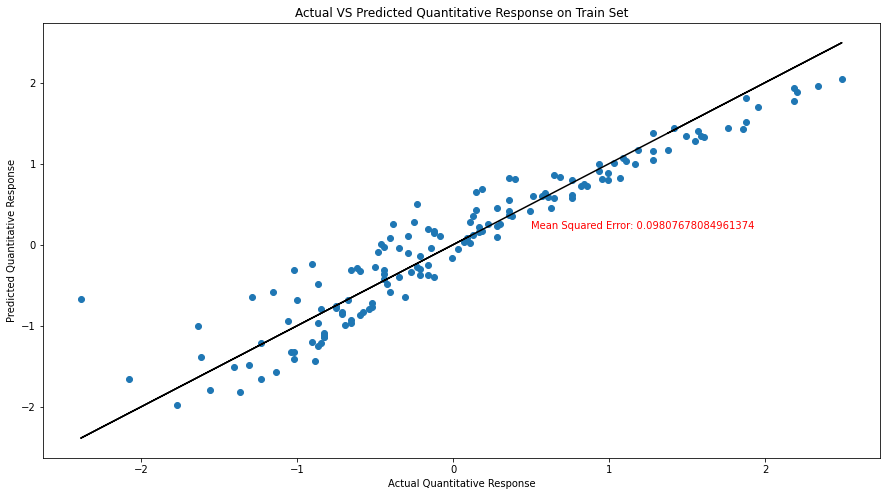

In [26]:
init_w = initialize_weights(x_train, random = True)

alpha = 0.01               # value of alpha
iterations = 10000         # number of iterations

# gradient descent algorithm for training and testing
weights_matrix_training, cost_matrix_training = grad_descent(x_train, y_train, init_w, alpha, iterations)
weights_matrix_testing, cost_matrix_testing = grad_descent(x_test, y_test, init_w, alpha, iterations)

# predicting the quantitative response using the train set
y_hat_train = predict(x_train, weights_matrix_training[-1])

# plotting the actual and predicted response of the train set
plt.figure(figsize=(15,8))
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.title('Actual VS Predicted Quantitative Response on Train Set')
plt.scatter(y_train, y_hat_train)
plt.plot(y_train, y_train, color="black")
plt.text(0.5, 0.20, f"Mean Squared Error: {mean_squared_error(y_train, y_hat_train)}", color='red')
plt.show()

#### Based on the figure, the MSE is 0.098, in which we can conclude that the model is an accurate model.

### Predict the quantitative response y on the test set

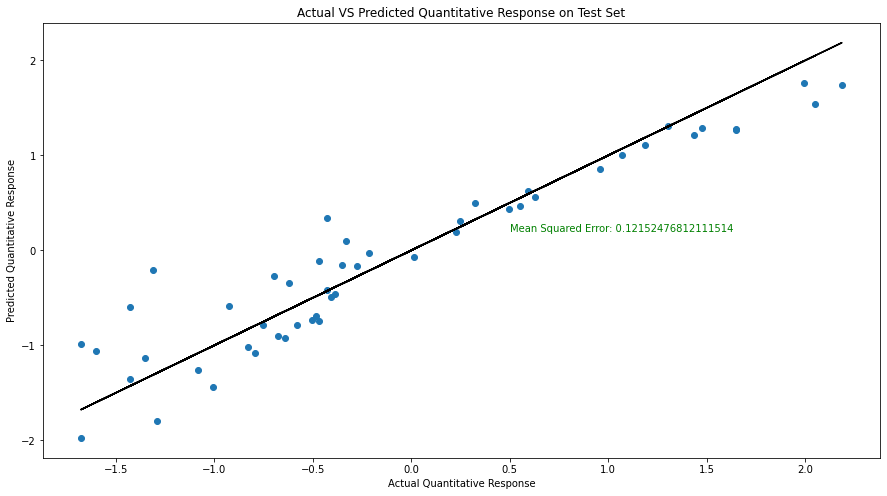

In [27]:
# quantitative response using the test set
y_hat_test = predict(x_test, weights_matrix_training[-1])

# plotting the actual and predicted response of the test set
plt.figure(figsize=(15,8))
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.title('Actual VS Predicted Quantitative Response on Test Set')
plt.scatter(y_test, y_hat_test)
plt.plot(y_test, y_test, color="black")
plt.text(0.5, 0.20, f"Mean Squared Error: {mean_squared_error(y_test, y_hat_test)}", color='green')
plt.show()

#### For the test set, the MSE is 0.12, in which a way higher than the training set. Therefore it is less accurate than the model in the training set.

### Predict the sales on the actual data

In [29]:
df_standardize

#Add a new column which is the predicted sales
df_standardize['Predicted Sales'] = predict(df_standardize[['bias', 'TV', 'Radio', 'Newspaper']], weights_matrix_training[-1])

#Revert back the standardized data into the original form 
df_standardize['TV'] = df_standardize['TV'] * df['TV'].std() + df['TV'].mean()
df_standardize['Radio'] = df_standardize['Radio'] * df['Radio'].std() + df['Radio'].mean()
df_standardize['Newspaper'] = df_standardize['Newspaper'] * df['Newspaper'].std() + df['Newspaper'].mean()
df_standardize['Sales'] = df_standardize['Sales'] * df['Sales'].std() + df['Sales'].mean()
df_standardize['Predicted Sales'] = df_standardize['Predicted Sales'] * df['Sales'].std() + df['Sales'].mean()

#Insert Residuals column
df_standardize['Residuals'] = df_standardize['Sales'] - df_standardize['Predicted Sales']

# Drop all_ones column
df_standardize.drop('bias', axis = 1, inplace = True)

df_standardize

,TV,Radio,Newspaper,Sales,Predicted Sales,Residuals
0,230.308426,37.836477,69.296979,22.120270,20.675777,1.444493
1,44.242678,39.340241,45.136502,10.390910,12.589189,-2.198279
2,16.874171,45.956803,69.397230,9.288149,12.748384,-3.460234
3,151.511186,41.345260,58.570128,18.511236,17.792116,0.719120
4,180.884712,10.768723,58.469877,12.897183,13.308704,-0.411521
...,...,...,...,...,...,...
195,37.926869,3.650906,13.757957,7.583883,5.399965,2.183918
196,94.067396,4.853917,8.043654,9.689153,8.088567,1.600586
197,177.075176,9.264959,6.339388,12.796932,12.595523,0.201410
198,283.942679,42.047016,66.289451,25.528802,23.835787,1.693015


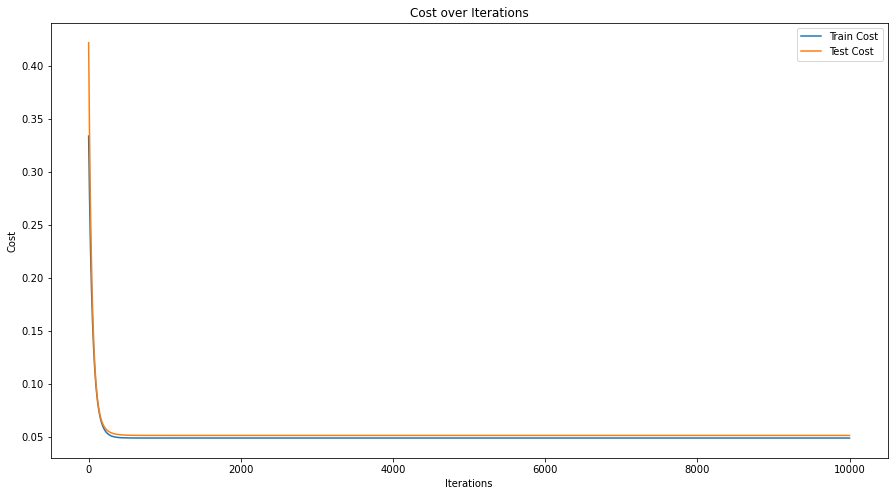

In [30]:
plt.figure(figsize=(15,8))
plt.plot(cost_matrix_training, label='Train Cost')
plt.plot(cost_matrix_testing, label='Test Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.legend()
plt.show()

#### In the cost vs iterations plot, it can be seen that the model becomes more accurate if there is more iterations.

# Questions

### 1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model.

In [31]:
init_w = initialize_weights(x_train)

alpha = 0.01    
iterations = 50000                                                  

we, co = grad_descent(x_train, y_train, init_w, alpha, iterations)
optimal_weights = we[-1]
print(f"Optimal Weights: {optimal_weights}") 

# linear model
print(f"hΘ(x) = {optimal_weights[0]} + {optimal_weights[1]}*TV + {optimal_weights[2]}*Radio + {optimal_weights[3]}*Newspaper")

Optimal Weights: [0.00205049 0.72967516 0.53842028 0.02079669]
hΘ(x) = 0.002050489151117927 + 0.7296751593382628*TV + 0.5384202815746951*Radio + 0.020796693492943*Newspaper


#### The weights vary depending on the feature. The TV data got the highest weights among the four weights.

### 2. Provide a scatter plot of the (y^i) hut and y^i for both the train and test set.

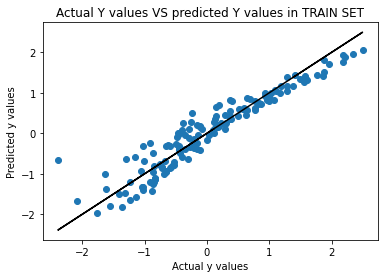

In [38]:
# For training data
predict_train = predict(x_train, optimal_weights)
plt.scatter(y_train, predict_train)
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Actual Y values VS predicted Y values in TRAIN SET')
plt.plot(y_train, y_train, color='Black')
plt.show()

In [39]:
print(f"The r2 score is {r2_score(y_train, predict_train)}")

The r2 score is 0.8979173587493009


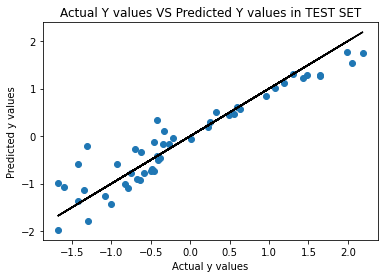

In [41]:
#For testing data
predict_test = predict(x_test, optimal_weights)
plt.scatter(y_test, predict_test)
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Actual Y values VS Predicted Y values in TEST SET')
plt.plot(y_test, y_test, color='black')
plt.show()

In [42]:
print(f"The r2 score is {r2_score(y_test, predict_test)}")

The r2 score is 0.8899310314828994


### 3. What happems to the error, r2, and cost as the number of iterations increase?

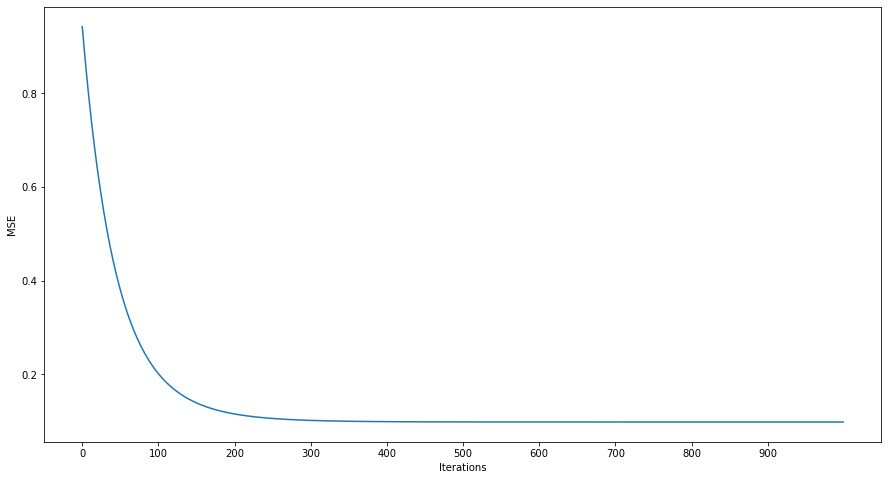

In [44]:
MSE_array = []
for i in range(iterations):
    MSE = mean_squared_error(y_train, predict(x_train, we[i]))
    MSE_array.append(MSE)

plt.figure(figsize=(15,8))
plt.plot(MSE_array[0:1000])
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xticks(np.arange(0, 1000, 100))
plt.show()

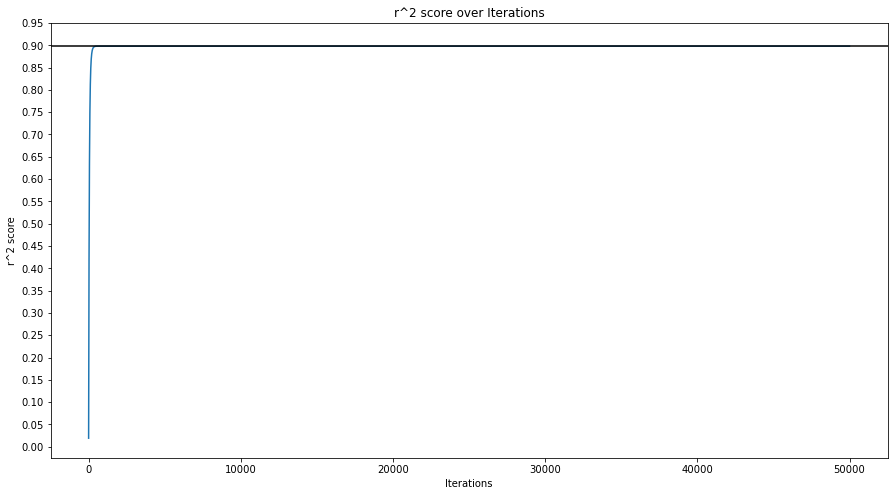

The maximum r^2 score is 0.8979173587493009


In [46]:
r2_array = []
for i in range(iterations):
    r2 = r2_score(y_train, predict(x_train, we[i]))
    r2_array.append(r2)

plt.figure(figsize=(15,8))
plt.plot(r2_array)
plt.xlabel('Iterations')
plt.ylabel('r^2 score')
plt.title('r^2 score over Iterations')
plt.yticks(np.arange(0, 1, 0.05))
plt.axhline(y=max(r2_array), color='black')
plt.show()

print(f"The maximum r^2 score is {max(r2_array)}")

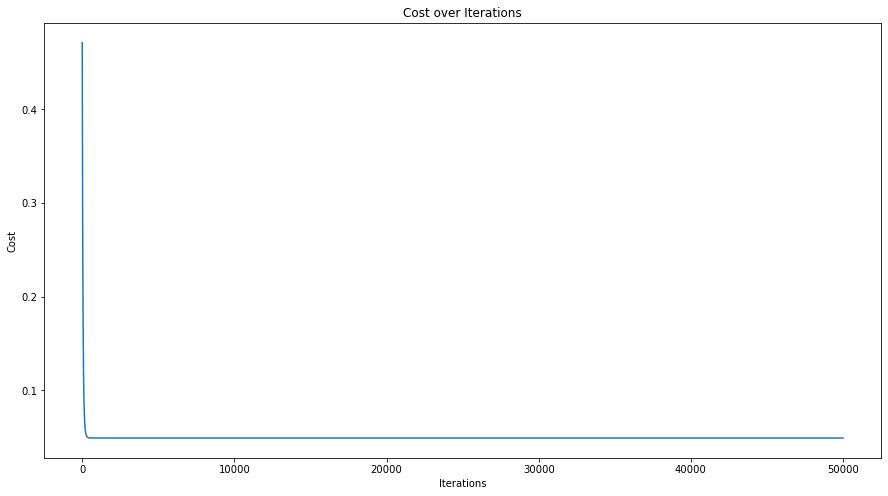

In [47]:
# cost over iterations plot
plot_costs(co)

### 4. Visualize the cost function of each learning rate in only one plot

In [48]:
# number of optimal iterations
def optimal_iterations(max_r2, r2_array):
    for i in range(len(r2_array)):
        if r2_array[i] == max_r2:
            return i

optimal_num = optimal_iterations(max(r2_array), r2_array)
print(f"The optimal number of iterations is {optimal_num}")

The optimal number of iterations is 2663


In [49]:
# cost and weights at the optimal iterations and 
print(f"The cost at the optimal number of iterations is {co[optimal_num]}")
print(f"The weights at the optimal number of iterations are {we[optimal_num]}\n")

#Last iteration
print(f"The cost at the last iteration is {co[-1]}")
print(f"The weights at the last iteration are {we[-1]}")

The cost at the optimal number of iterations is 0.04903839042480687
The weights at the optimal number of iterations are [0.00205049 0.72967516 0.53842028 0.0207967 ]

The cost at the last iteration is 0.04903839042480687
The weights at the last iteration are [0.00205049 0.72967516 0.53842028 0.02079669]


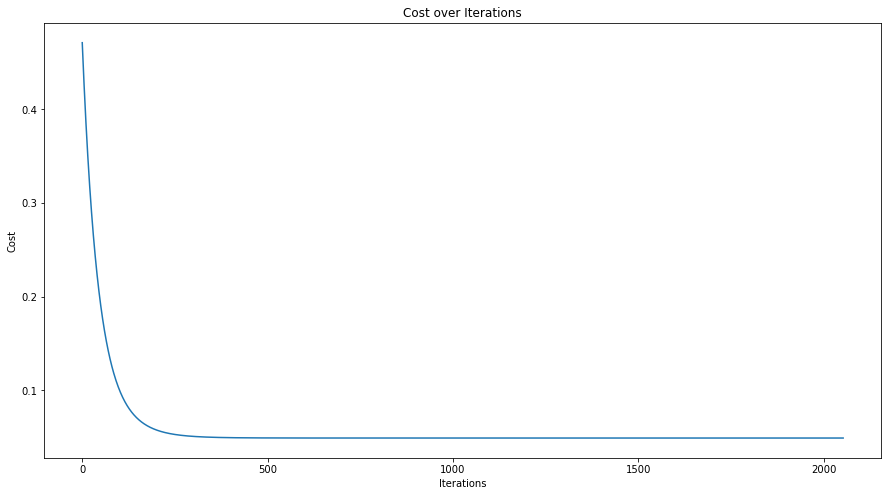

In [50]:
# gradient descent algorithm
def optimized_gda(x_val, y, init_w, alpha, iterations, diff_threshold):
    last_iter = 0
    we = []
    co = []

    for i in range(iterations):
        init_w = update_weights(x_val, y, init_w, alpha)
        we.append(init_w)
        cost = compute_cost(x_val, y, init_w)
        co.append(cost)

        if i > 0 and diff_threshold > abs(co[i] - co[i - 1]):
            last_iter = i
            break
        last_iter = i
    
    return we, co, last_iter

iterations = 50000
alpha = 0.01

diff_threshold = 1.0e-15

we, co, optimal_iterations = optimized_gda(x_train, y_train, init_w, alpha, iterations, diff_threshold)

plot_costs(co)

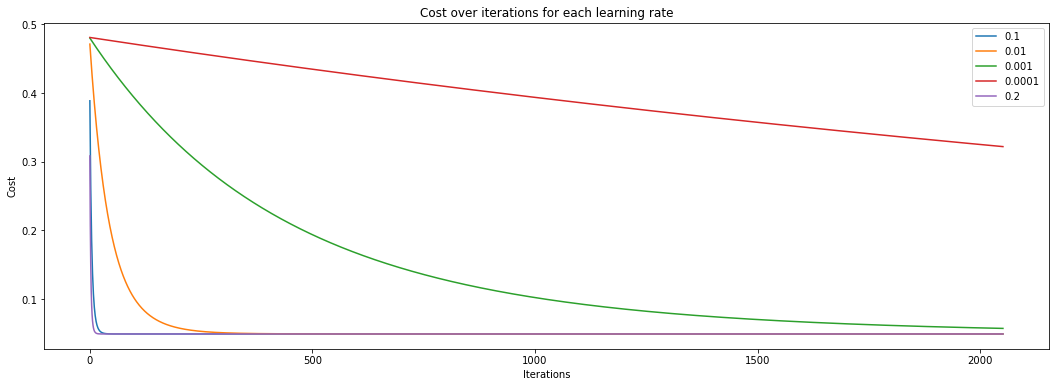

In [51]:
init_w = initialize_weights(x_train)

iterations = optimal_iterations

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]

cost_dict = {i:0 for i in learning_rates}
error_dict = {i:0 for i in learning_rates}
co_dict = {i:[] for i in learning_rates}

for alpha in learning_rates:
    we, co = grad_descent(x_train, y_train, init_w, alpha, iterations)
    cost_dict[alpha] = co[-1]
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(x_train, we[-1]))
    co_dict[alpha] = co

plt.figure(figsize=(18,6))
for alpha in learning_rates:
    plt.plot(co_dict[alpha], label = alpha)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over iterations for each learning rate')
plt.legend()
plt.show()

In [52]:
learning_rates = pd.DataFrame({'Learning Rate': list(cost_dict.keys()), 'Cost': list(cost_dict.values()), 'Error': list(error_dict.values())})
learning_rates

,Learning Rate,Cost,Error
0,0.1000,0.049038,0.098077
1,0.0100,0.049038,0.098077
2,0.0010,0.057162,0.114323
3,0.0001,0.321904,0.643808
4,0.2000,0.049038,0.098077


#### The bigger the learning rate, the faster the model can develop in the less iterations. The smaller learning rate would require more iterations.

### 5. Is there a relationship on the learning rate and the number of iterations?

#### - The lesser learning rate requires more iterations. Shown in the plot above, the learning rate of 0.0001 is less steeper compared to the other learning rates. Thus the cost of the data moves slowly compared to the other rates. The learning rates of 0.1, 0.2, and 0.01 gradually changes in less than 500 iterations. Therefore, there is a relationship between the learning rate and the number of iterations.

### 6. Compare the results with the results of ordinary least squares function.

In [55]:
from sklearn.linear_model import LinearRegression
ordinary_least_squares = LinearRegression()
ordinary_least_squares.fit(x_train, y_train).coef_
r2_OLS = r2_score(y_train, ordinary_least_squares.predict(x_train))
r2_GDA = r2_array[-1]

print(f"The results of Gradient Descent is {r2_GDA}")
print(f"The results of Ordinary Least Squares is {r2_OLS}")

The results of Gradient Descent is 0.8979173587493009
The results of Ordinary Least Squares is 0.8979173587493009
